# 📚 Step 1 : PDF Ingestion

**Goal**: Extract text from all PDF reports and create a structured corpus

**Pipeline**:
1. Load all PDFs from `data/raw/`
2. Extract text with `pdfplumber` (fallback on `PyPDF2`)
3. Create metadata for each document
4. Save results in `data/processed/`
5. Generate a quality report

## 🔧 Setup Config & Imports

In [1]:
import sys
from pathlib import Path

sys.path.append(str(Path.cwd().parent / 'src')) # Change

import warnings
warnings.filterwarnings('ignore')

# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Custom module
from data_loader import PDFTextExtractor

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("✅ Imports")

✅ Imports


## 📂 Check folders structure

In [2]:
# Define paths
PROJECT_ROOT = Path.cwd().parent
RAW_DATA = PROJECT_ROOT / "data" / "raw"
PROCESSED_DATA = PROJECT_ROOT / "data" / "processed"

print(f"📁 Project root    : {PROJECT_ROOT}")
print(f"📁 Raw data        : {RAW_DATA}")
print(f"📁 Processed data  : {PROCESSED_DATA}")

📁 Project root    : c:\Users\hrobi\Documents\GitHub\language-of-autonomy
📁 Raw data        : c:\Users\hrobi\Documents\GitHub\language-of-autonomy\data\raw
📁 Processed data  : c:\Users\hrobi\Documents\GitHub\language-of-autonomy\data\processed


In [3]:
if not RAW_DATA.exists():
    print("\n⚠️ data/raw folder not found. Creating...")
    RAW_DATA.mkdir(parents=True, exist_ok=True)
    print("✅ Folder created. Place PDF(s) in new data/raw folder.")
else:
    pdf_count = len(list(RAW_DATA.glob("*.pdf")))
    print(f"\n✅ data/raw folder found with {pdf_count} PDF(s)")


✅ data/raw folder found with 20 PDF(s)


## 🚀 PDFs extraction

In [4]:
# Initiate extractor
extractor = PDFTextExtractor(
    raw_data_path=str(RAW_DATA),
    processed_data_path=str(PROCESSED_DATA)
)

In [5]:
print("🔄 Begin extraction...\n")
texts, metadata = extractor.process_all_pdfs()
print(f"\n✅ Extraction finished : {len(texts)} documents extracted")

🔄 Begin extraction...

📚 20 PDF files found

[1/20] Processing: Bain_report_technology_report_2025.pdf


Cannot set gray non-stroke color because /'P0' is an invalid float value


  ✅ 20,593 words extracted
  📄 77 pages | Type: Consulting

[2/20] Processing: BCG_AI_Agents_2025.pdf
  ✅ 1,601 words extracted
  📄 9 pages | Type: Consulting

[3/20] Processing: Deloitte_The_business_imperative_for_Agentic_AI_2025.pdf
  ✅ 3,966 words extracted
  📄 26 pages | Type: Consulting

[4/20] Processing: Google_Agentic_AI_TAM_Analysis_2025.pdf
  ✅ 22,140 words extracted
  📄 72 pages | Type: Industry

[5/20] Processing: Google_The_ROI_of_AI_2025.pdf
  ✅ 1,214 words extracted
  📄 8 pages | Type: Industry

[6/20] Processing: Harvard_Designing_a_Successful_Agentic_AI_System_2025.pdf
  ✅ 2,648 words extracted
  📄 7 pages | Type: Academic

[7/20] Processing: ITI_Understanding_Agentic_AI_Policy_Guide_2025.pdf


Cannot set gray stroke color because /'P0' is an invalid float value
Cannot set gray stroke color because /'P0' is an invalid float value
Cannot set gray stroke color because /'P0' is an invalid float value
Cannot set gray stroke color because /'P0' is an invalid float value


  ✅ 5,992 words extracted
  📄 16 pages | Type: Policy

[8/20] Processing: McKinsey_Empowering_advanced_industries_with_agentic_AI_2025.pdf
  ✅ 2,455 words extracted
  📄 8 pages | Type: Consulting

[9/20] Processing: McKinsey_The_agentic_organization_contours_of_the_next_paradigm_for_the_AI_era_2025.pdf
  ✅ 4,817 words extracted
  📄 11 pages | Type: Consulting

[10/20] Processing: McKinsey_What_is_an_AI_Agent_2025.pdf
  ✅ 3,390 words extracted
  📄 11 pages | Type: Consulting

[11/20] Processing: Microsoft_Agent_AI_Towards_a_Holistic_Intelligence_2025.pdf
  ✅ 6,706 words extracted
  📄 21 pages | Type: Industry

[12/20] Processing: MIT_Reimagining_the_future_of_banking_with_agentic_AI_2025.pdf
  ✅ 3,789 words extracted
  📄 10 pages | Type: Academic

[13/20] Processing: MIT_The_Emerging_Agentic_enterprise_2025.pdf
  ✅ 11,952 words extracted
  📄 40 pages | Type: Academic

[14/20] Processing: OECD_Explanatory_memorandum_on_the_updated_oecd_definition_of_an_AI_system_2024.pdf
  ✅ 3,597 words 

Cannot set gray non-stroke color because /'P1' is an invalid float value
Cannot set gray non-stroke color because /'P1' is an invalid float value
Cannot set gray non-stroke color because /'P2' is an invalid float value
Cannot set gray non-stroke color because /'P1' is an invalid float value
Cannot set gray non-stroke color because /'P2' is an invalid float value
Cannot set gray non-stroke color because /'P1' is an invalid float value


  ✅ 4,183 words extracted
  📄 34 pages | Type: Industry

[17/20] Processing: OpenAI_Practices_for_Governing_Agentic_AI_Systems_2025.pdf
  ✅ 12,210 words extracted
  📄 23 pages | Type: Industry

[18/20] Processing: PwC_Agentic_AI_the_new_frontier_in_GenAI_2024.pdf
  ✅ 6,770 words extracted
  📄 22 pages | Type: Consulting

[19/20] Processing: Standford_Policy_brief_Simulating_human_behavior_with_AI_Agents_2025.pdf
  ✅ 2,320 words extracted
  📄 6 pages | Type: Academic

[20/20] Processing: WEF_AI_Agents_in_Action_Foundations_for_Evaluation_and_Governance_2025.pdf


Cannot set gray stroke color because /'P0' is an invalid float value
Cannot set gray stroke color because /'P1' is an invalid float value
Cannot set gray stroke color because /'P2' is an invalid float value
Cannot set gray stroke color because /'P3' is an invalid float value
Cannot set gray stroke color because /'P0' is an invalid float value
Cannot set gray stroke color because /'P0' is an invalid float value
Cannot set gray stroke color because /'P0' is an invalid float value
Cannot set gray stroke color because /'P0' is an invalid float value


  ✅ 11,304 words extracted
  📄 34 pages | Type: Policy


✅ Extraction finished : 20 documents extracted


## 📊 Metadata analysis

In [6]:
# Create DataFrame for analysis
df_metadata = pd.DataFrame.from_dict(metadata, orient='index')
df_metadata.index.name = 'document_id'
df_metadata = df_metadata.reset_index()

print("📋 Extracted metadata overview:\n")
df_metadata[['filename', 'word_count', 'page_count', 'source_type']]

📋 Extracted metadata overview:



,filename,word_count,page_count,source_type
0,Bain_report_technology_report_2025.pdf,20593,77,Consulting
1,BCG_AI_Agents_2025.pdf,1601,9,Consulting
2,Deloitte_The_business_imperative_for_Agentic_A...,3966,26,Consulting
3,Google_Agentic_AI_TAM_Analysis_2025.pdf,22140,72,Industry
4,Google_The_ROI_of_AI_2025.pdf,1214,8,Industry
5,Harvard_Designing_a_Successful_Agentic_AI_Syst...,2648,7,Academic
6,ITI_Understanding_Agentic_AI_Policy_Guide_2025...,5992,16,Policy
7,McKinsey_Empowering_advanced_industries_with_a...,2455,8,Consulting
8,McKinsey_The_agentic_organization_contours_of_...,4817,11,Consulting
9,McKinsey_What_is_an_AI_Agent_2025.pdf,3390,11,Consulting


### 📈 Descriptives Stats

In [7]:
stats = {
    "Documents count": len(df_metadata),
    "Words count": df_metadata['word_count'].sum(),
    "Pages count": df_metadata['page_count'].sum(),
    "Average words/doc": int(df_metadata['word_count'].mean()),
    "Median words/doc": int(df_metadata['word_count'].median()),
    "Min words": df_metadata['word_count'].min(),
    "Max words": df_metadata['word_count'].max()
}

for key, value in stats.items():
    print(f"{key:25} : {value:,}")

Documents count           : 20
Words count               : 136,472
Pages count               : 459
Average words/doc         : 6,823
Median words/doc          : 4,500
Min words                 : 1,214
Max words                 : 22,140


### 📊 Ingestion overview visualizations

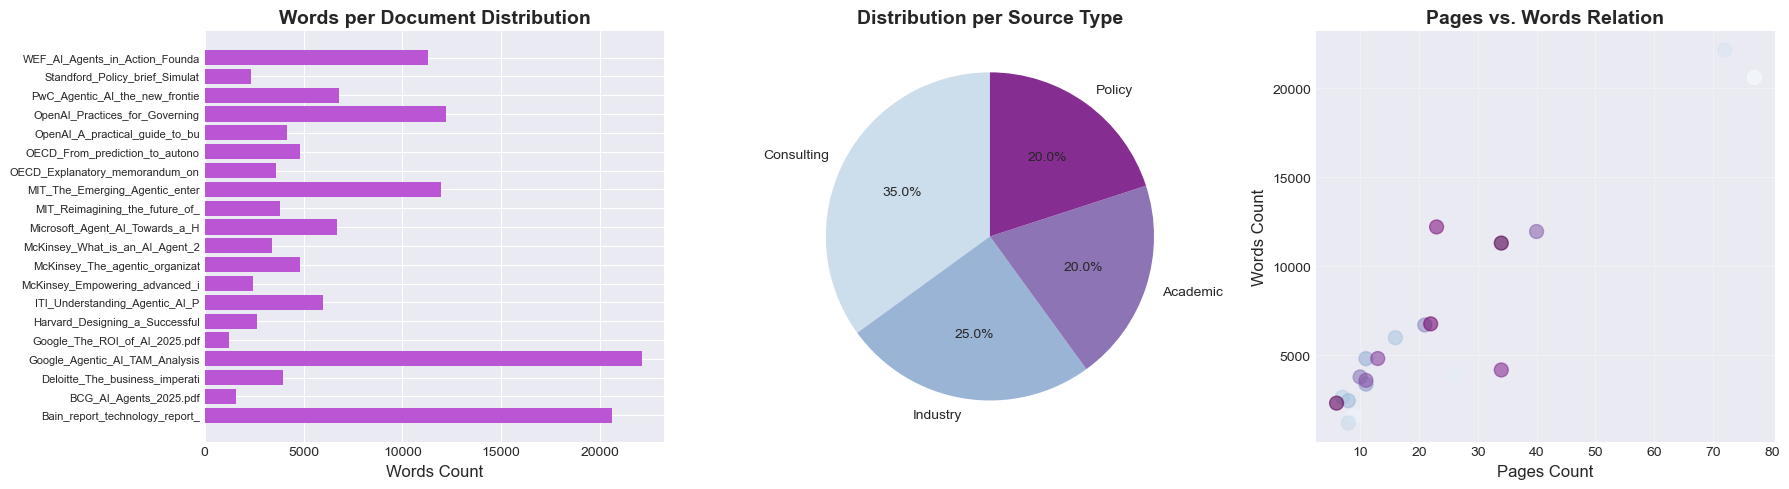


💾 Graph saved to: data/processed/ingestion_overview.png


In [8]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Words per doc distribution
axes[0].barh(df_metadata['filename'].str[:30], df_metadata['word_count'], color='mediumorchid')
axes[0].set_xlabel('Words Count', fontsize=12)
axes[0].set_title('Words per Document Distribution', fontsize=14, fontweight='bold')
axes[0].tick_params(axis='y', labelsize=8)

# Distribution per source type
source_counts = df_metadata['source_type'].value_counts()
colors = sns.color_palette('BuPu', len(source_counts))
axes[1].pie(source_counts.values, labels=source_counts.index, autopct='%1.1f%%', 
            colors=colors, startangle=90)
axes[1].set_title('Distribution per Source Type', fontsize=14, fontweight='bold')

# Pages vs words relation
axes[2].scatter(df_metadata['page_count'], df_metadata['word_count'], 
                s=100, alpha=0.6, c=range(len(df_metadata)), cmap='BuPu')
axes[2].set_xlabel('Pages Count', fontsize=12)
axes[2].set_ylabel('Words Count', fontsize=12)
axes[2].set_title('Pages vs. Words Relation', fontsize=14, fontweight='bold')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(PROCESSED_DATA / 'ingestion_overview.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n💾 Graph saved to: data/processed/ingestion_overview.png")

## 💾 Save results

In [9]:
# Save texts + metadata
extractor.save_results(texts, metadata)

💾 Texts saved to: c:\Users\hrobi\Documents\GitHub\language-of-autonomy\data\processed\texts
💾 Metadata saved to: c:\Users\hrobi\Documents\GitHub\language-of-autonomy\data\processed\metadata\corpus_metadata.json


In [10]:
# Save metadata DataFrame in csv format
csv_path = PROCESSED_DATA / "metadata" / "corpus_metadata.csv"
df_metadata.to_csv(csv_path, index=False, encoding='utf-8')
print(f"✅ Metadata csv saved to: {csv_path}")

✅ Metadata csv saved to: c:\Users\hrobi\Documents\GitHub\language-of-autonomy\data\processed\metadata\corpus_metadata.csv


## 📄 Extraction report generation

In [11]:
report = extractor.generate_extraction_report(texts, metadata)
print(report)


PDF EXTRACTION REPORT

📊 STATISTIQUES GÉNÉRALES
──────────────────────────────────────────────────────────────────────
Number of documents processed : 20
Total words                   : 136,472
Total pages                   : 459
Average words/document        : 6,823

📚 SOURCE TYPE DISTRIBUTION
──────────────────────────────────────────────────────────────────────
Academic             : 4 document(s)
Consulting           : 7 document(s)
Industry             : 5 document(s)
Policy               : 4 document(s)

──────────────────────────────────────────────────────────────────────
📄 DOCUMENT DETAILS
──────────────────────────────────────────────────────────────────────

• Bain_report_technology_report_2025.pdf
  Words: 20,593 | Pages: 77 | Type: Consulting

• BCG_AI_Agents_2025.pdf
  Words: 1,601 | Pages: 9 | Type: Consulting

• Deloitte_The_business_imperative_for_Agentic_AI_2025.pdf
  Words: 3,966 | Pages: 26 | Type: Consulting

• Google_Agentic_AI_TAM_Analysis_2025.pdf
  Words: 22,1

In [12]:
# Save report
report_path = PROCESSED_DATA / "extraction_report.txt"
with open(report_path, 'w', encoding='utf-8') as f:
    f.write(report)
print(f"💾 Report saved to: {report_path}")

💾 Report saved to: c:\Users\hrobi\Documents\GitHub\language-of-autonomy\data\processed\extraction_report.txt


## 🔍 Check text sample

In [13]:
if texts:
    first_doc_id = list(texts.keys())[0]
    print(f"📄 Document overview: {first_doc_id}\n")
    print(texts[first_doc_id][:500])
    print(f"\n... ({len(texts[first_doc_id])} characters total)")

📄 Document overview: Bain_report_technology_report_2025

Technology Report 2025 AI leaders are extending their edge. Authors and acknowledgments David Crawford, chairman of Bain & Company’s Global Technology, Media, and Telecommunications practice; Anne Hoecker, global leader of the TMT practice; and Dana Aulanier, practice vice president of the TMT practice, prepared this report. Bain Partners Syed Ali, Laurent-Pierre Baculard, Bharat Bansal, Ann Bosche, Peter Bowen, Steven Breeden, Alessandro Cannarsi, Willy Chang, Matthew Crupi, Arjun Dutt, Greg Fi

... (134654 characters total)


## ✅ Quality check

In [14]:
# Check if all docs have content
issues = []
for doc_id, meta in metadata.items():
    if meta['word_count'] < 100:
        issues.append(f"⚠️ {meta['filename']}: only {meta['word_count']} words")
    if meta['page_count'] == 0:
        issues.append(f"⚠️ {meta['filename']}: 0 pages found")

if issues:
    print("\n".join(issues))
else:
    print("✅ All docs extracted properly!")

print(f"📊 Success rate: {len(texts)}/{len(list(RAW_DATA.glob('*.pdf')))} documents")

✅ All docs extracted properly!
📊 Success rate: 20/20 documents


## 📋 Step 1 summary

**✅ Repeted steps:**
- Text extraction from all PDFs
- Metadata creation (number of words, pages, source type)
- Save in `data/processed/`
- Generate visualizations and report

**➡️ Next step:**
- Step 2: NLP preprocessing (cleaning, tokenization, lemmatization)

In [15]:
# Summary Step 1
print("STEP 1 FINISHED SUCCESSFULLY!")
print("\n📂 Generated files:")
print(f"  • Individual texts   : {PROCESSED_DATA / 'texts'}")
print(f"  • JSON Metadata      : {PROCESSED_DATA / 'metadata' / 'corpus_metadata.json'}")
print(f"  • CSV Metadata       : {PROCESSED_DATA / 'metadata' / 'corpus_metadata.csv'}")
print(f"  • Extraction report  : {PROCESSED_DATA / 'extraction_report.txt'}")
print(f"  • Ingestion overview : {PROCESSED_DATA / 'ingestion_overview.png'}")
print("\n➡️ Ready for Step 2: NLP Preprocessing\n")

STEP 1 FINISHED SUCCESSFULLY!

📂 Generated files:
  • Individual texts   : c:\Users\hrobi\Documents\GitHub\language-of-autonomy\data\processed\texts
  • JSON Metadata      : c:\Users\hrobi\Documents\GitHub\language-of-autonomy\data\processed\metadata\corpus_metadata.json
  • CSV Metadata       : c:\Users\hrobi\Documents\GitHub\language-of-autonomy\data\processed\metadata\corpus_metadata.csv
  • Extraction report  : c:\Users\hrobi\Documents\GitHub\language-of-autonomy\data\processed\extraction_report.txt
  • Ingestion overview : c:\Users\hrobi\Documents\GitHub\language-of-autonomy\data\processed\ingestion_overview.png

➡️ Ready for Step 2: NLP Preprocessing

